In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing the dataset
dataset = pd.read_csv("Phishing Data.csv")

In [4]:
dataset.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [5]:
#Splitting data and labels
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

#Normalising values
from sklearn import preprocessing
normalized_x = preprocessing.normalize(x)

In [6]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_x,y,test_size = 0.25, random_state =0 )

In [7]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logisticRegr = LogisticRegression()
SVMclassifier = SVC(kernel='linear')
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
DecisionClassifier = DecisionTreeClassifier()
RFclassifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)

In [13]:
#Fitting Logistic Regression
logisticRegr.fit(x_train,y_train)

#Predicting the test result
y_pred_Logit = logisticRegr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ConfusionMatrix_Logit = confusion_matrix(y_test, y_pred_Logit)
print(ConfusionMatrix_Logit)

ClassificationReport_Logit = classification_report(y_test, y_pred_Logit)
print(ClassificationReport_Logit)

[[314  20]
 [ 18 262]]
             precision    recall  f1-score   support

          0       0.95      0.94      0.94       334
          1       0.93      0.94      0.93       280

avg / total       0.94      0.94      0.94       614



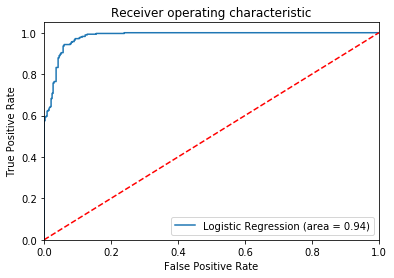

In [15]:
#ROC Curve for logistic Regression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
#Fitting Logistic Regression
SVMclassifier.fit(x_train,y_train)

#Predicting the test result
y_pred_SVM = SVMclassifier.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ConfusionMatrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print(ConfusionMatrix_SVM)

ClassificationReport_SVM = classification_report(y_test, y_pred_SVM)
print(ClassificationReport_SVM)

[[313  21]
 [ 20 260]]
             precision    recall  f1-score   support

          0       0.94      0.94      0.94       334
          1       0.93      0.93      0.93       280

avg / total       0.93      0.93      0.93       614



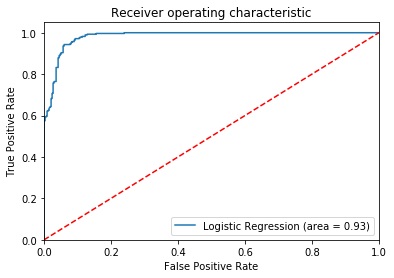

In [19]:
#ROC Curve for SVM
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, SVMclassifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [26]:
#Fitting Random Forest
RFclassifier.fit(x_train,y_train)

#Predicting the test result
y_pred_RF = RFclassifier.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [27]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ConfusionMatrix_RF = confusion_matrix(y_test, y_pred_RF)
print(ConfusionMatrix_RF)

ClassificationReport_RF = classification_report(y_test, y_pred_RF)
print(ClassificationReport_RF)

[[324  10]
 [  9 271]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       334
          1       0.96      0.97      0.97       280

avg / total       0.97      0.97      0.97       614



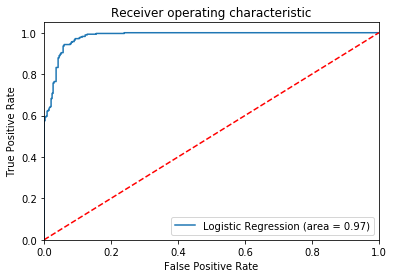

In [22]:
#ROC Curve for Random Forest model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, RFclassifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
#Fitting Decision Tree model
DecisionClassifier.fit(x_train,y_train)

#Predicting the test result
y_pred_DT = DecisionClassifier.predict(x_test)

In [30]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ConfusionMatrix_DT = confusion_matrix(y_test, y_pred_DT)
print(ConfusionMatrix_DT)

ClassificationReport_DT = classification_report(y_test, y_pred_DT)
print(ClassificationReport_DT)

[[326   8]
 [ 19 261]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       334
          1       0.97      0.93      0.95       280

avg / total       0.96      0.96      0.96       614



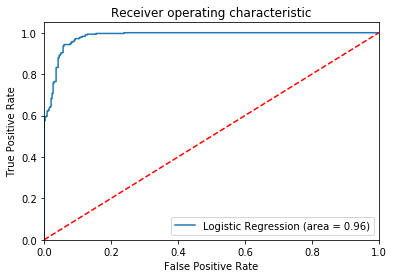

In [25]:
#ROC Curve for Decision Tree model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, DecisionClassifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

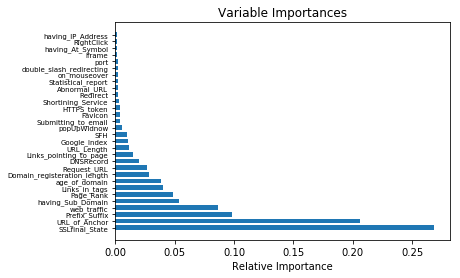

In [28]:
#Features Importance random forest
names = dataset.iloc[:,:-1].columns
importances = RFclassifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])


#plotting variable importance
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.7)
plt.yticks(np.arange(len(names)), names[indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

GBClassifier = GradientBoostingClassifier(random_state=20)

#Fitting Gradient Boosting model
GBClassifier.fit(x_train,y_train)

y_pred_GB = GBClassifier.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ConfusionMatrix_GB = confusion_matrix(y_test, y_pred_GB)
print(ConfusionMatrix_GB)

ClassificationReport_GB = classification_report(y_test, y_pred_GB)
print(ClassificationReport_GB)

[[317  17]
 [ 10 270]]
             precision    recall  f1-score   support

          0       0.97      0.95      0.96       334
          1       0.94      0.96      0.95       280

avg / total       0.96      0.96      0.96       614



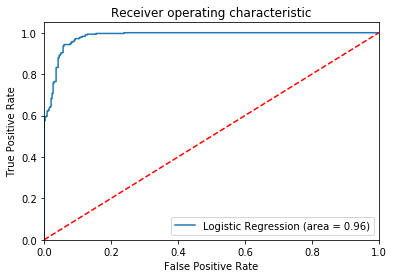

In [40]:
#ROC Curve for Decision Tree model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, GBClassifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [47]:
from sklearn.ensemble import AdaBoostClassifier

ADAClassifier = AdaBoostClassifier(n_estimators=10, random_state=7)

#Fitting ADA Boosting model
ADAClassifier.fit(x_train,y_train)


y_pred_ADA = ADAClassifier.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ConfusionMatrix_ADA = confusion_matrix(y_test, y_pred_ADA)
print(ConfusionMatrix_ADA)

ClassificationReport_ADA = classification_report(y_test, y_pred_ADA)
print(ClassificationReport_ADA)

[[314  20]
 [ 22 258]]
             precision    recall  f1-score   support

          0       0.93      0.94      0.94       334
          1       0.93      0.92      0.92       280

avg / total       0.93      0.93      0.93       614



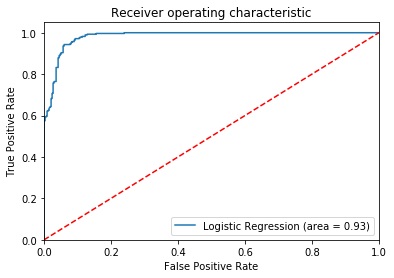

In [49]:
#ROC Curve for Decision Tree model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, ADAClassifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

#Voting Ensemble
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
estimators.append(('logistic', logisticRegr))
estimators.append(('SVM', SVMclassifier))
estimators.append(('DecisionTree', DecisionClassifier))
estimators.append(('RandomForest', RFclassifier))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9527687296416938

In [58]:
y_pred_Ensemble = ensemble.predict(x_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ConfusionMatrix_Ensemble = confusion_matrix(y_test, y_pred_Ensemble)
print(ConfusionMatrix_Ensemble)

ClassificationReport_Ensemble = classification_report(y_test, y_pred_Ensemble)
print(ClassificationReport_Ensemble)

[[325   9]
 [ 20 260]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.96       334
          1       0.97      0.93      0.95       280

avg / total       0.95      0.95      0.95       614



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


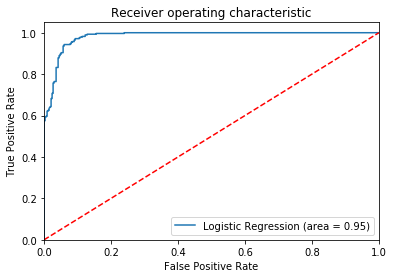

In [59]:
#ROC Curve for Decision Tree model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, ensemble.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()